# Real or Fake Face Detection using Deep Learning

![title](image/face-detection-recognition.png)

## Introduction

This project focuses on building a deep neural convolution network for the identification of real or fake faces.
With the rapid development in GANs it became easy to generate fake faces and videos which brings the threats like identity theft and privacy breaches. Hence neural network plays a major role as they automatically detects the important features without any human supervision.


## Business Problem

It's obvious that the cybercrime is the most known issue in this today's digital world. Biometrics face recognition is now emerging as many companies are now using it as a viable security solution offered by machine learning engineers.

One of the leading corporate company who provide softwares for the The United States Department of Homeland Security wants to build a secured complex neural network for the facial recognition systems which could be used by the border patrols.


## Approach

In this project we are following OSEMN data science workflow. It contains:
* Obtain (Generate data)
* Scrub (extracting columns,handling missing values)
* Explore (understanding data and create visualization)
* Model (building regression model)
* Interpret (communicating results)

### Obtain

It involes gathering the dataset and loading it in our jupyternotebook for feeding in our neural network model.

In [1]:
# !pip install keras
# !pip install opencv-python
# !pip install tensorflow
# !pip install pillow

In [5]:
# Import all the necessary pacake needed for the neural network model
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense,  BatchNormalization
from keras import backend as K
from keras import models
from keras import layers
import os, shutil
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model
import pip
import PIL
%matplotlib inline

In [6]:
# Generating the path for the dataset
train_dir = 'Data/real-vs-fake/train'
test_dir = 'Data/real-vs-fake/test'
val_dir = 'Data/real-vs-fake/valid'

In [7]:
#  reshape the images, fetch from the directories and initialize it to the variables.
train_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = train_dir, target_size = (128, 128), batch_size = 100000, class_mode = 'binary')
test_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = test_dir, target_size = (128, 128), batch_size = 20000, class_mode = 'binary')
val_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = val_dir, target_size = (128, 128), batch_size = 20000, class_mode = 'binary') 


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [8]:
# images and their labels are stored separately using next 
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [9]:
# checking the shape for finding the number of images in train, test and validation data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(100000, 128, 128, 3)
(100000,)
(20000, 128, 128, 3)
(20000,)
(20000, 128, 128, 3)
(20000,)


In [10]:
# reshaping the image to required format for the model
train_labels_reshape = train_labels.reshape(train_labels.shape[0], 1)
test_labels_reshape = test_labels.reshape(test_labels.shape[0], 1)
val_labels_reshape = val_labels.reshape(val_labels.shape[0], 1) 

### Scrub

Since neural network deals with images, all the needed data handling  is done in obtain phase. Dealing with missing and replacement of data is not needed here. 

### Explore

Now its important to understand our image data and create visualization to check how the real and fake images look like.

In [11]:
# Initialize the directory containing real images to the variable
real = os.listdir('Data/real-vs-fake/train/real')
real_fake_dir = 'Data/real-vs-fake/train/real'

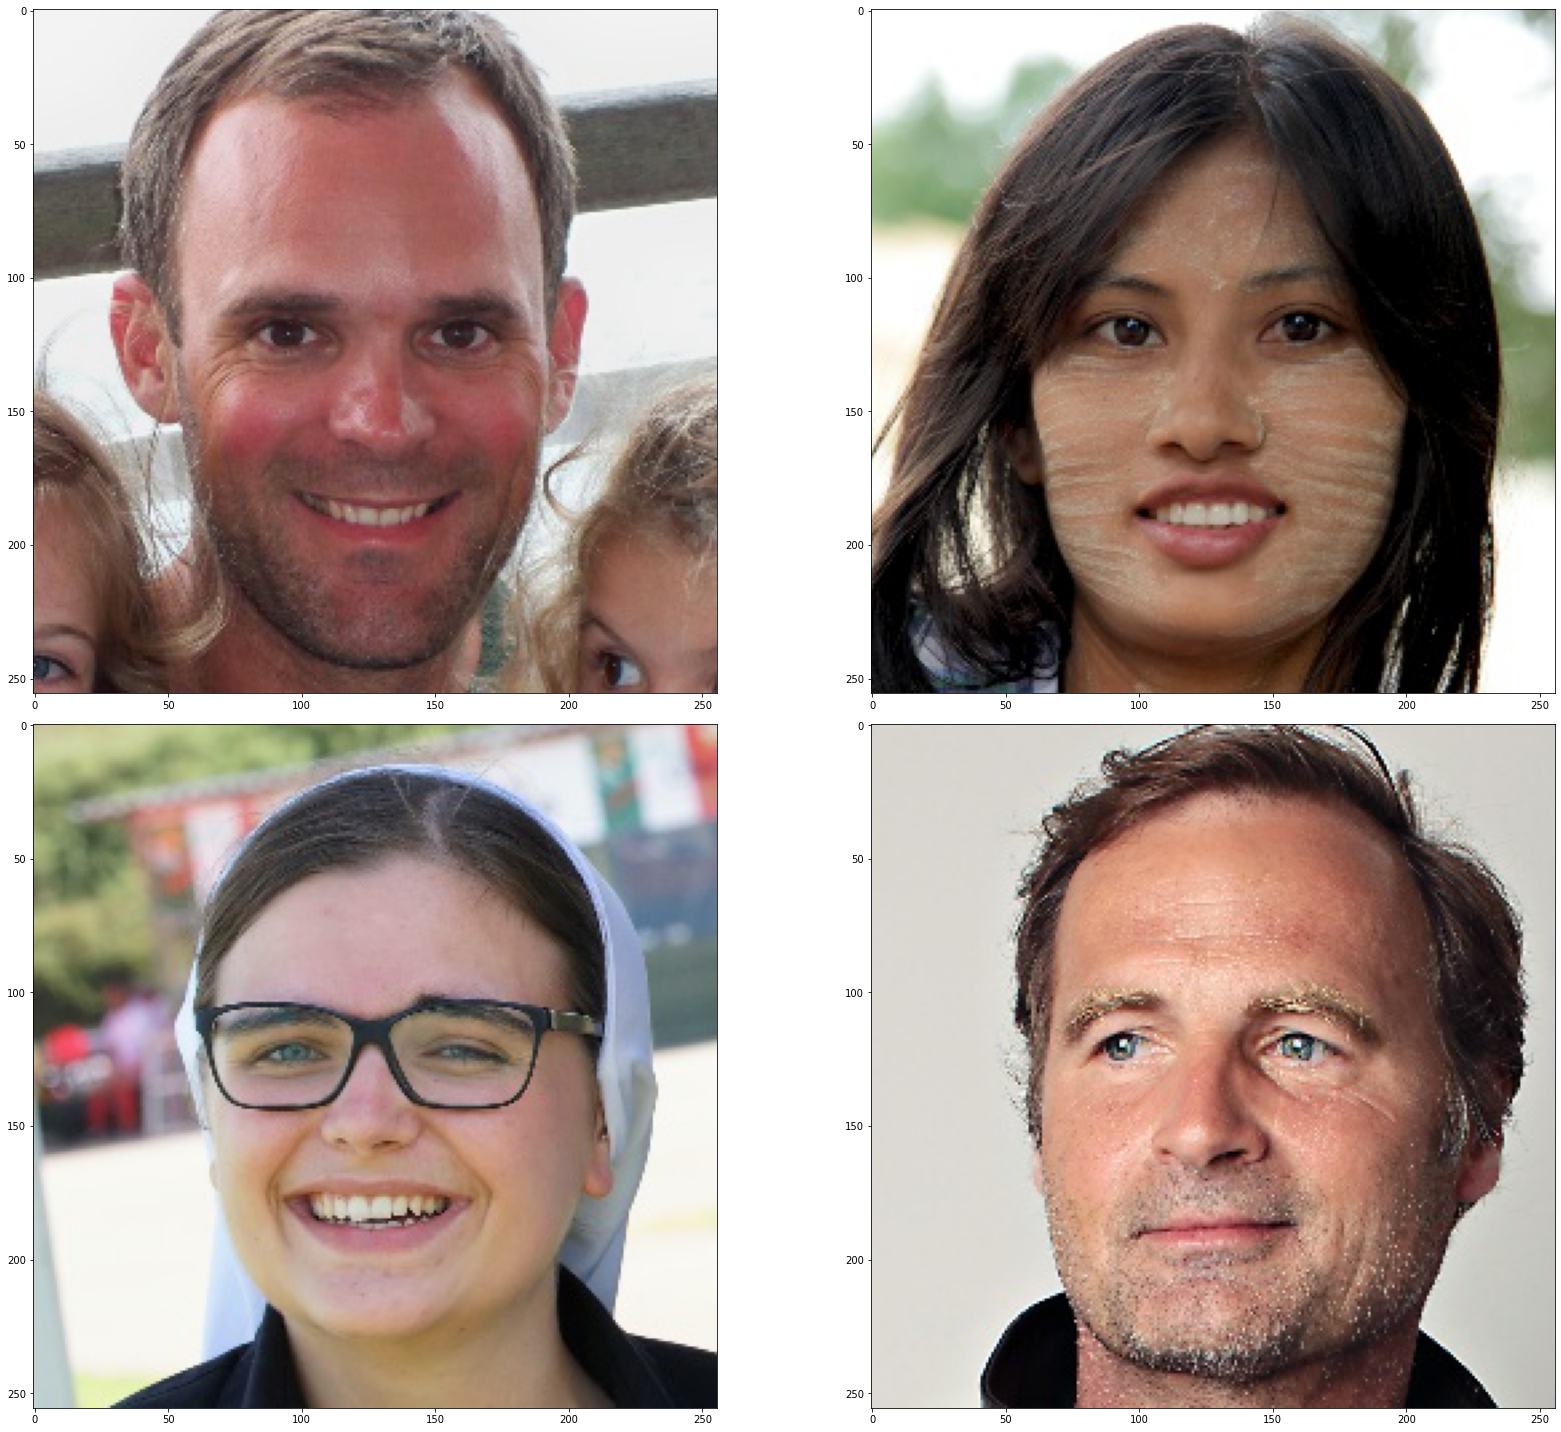

In [12]:
# plot random 4 images containing real images
plt.figure(figsize = (25, 20)) 

for i in range(4):
    plt.subplot(2, 2, i+1)    #
    img = plt.imread(os.path.join(real_fake_dir, real[i]))
#     plt.imshow(img[i])
    plt.imshow(img, cmap = 'gray')
plt.tight_layout()
plt.show()

In [13]:
# Initialize the directory containing fake images to the variable
fake = os.listdir('Data/real-vs-fake/train/fake')
real_fake_dir = 'Data/real-vs-fake/train/fake'

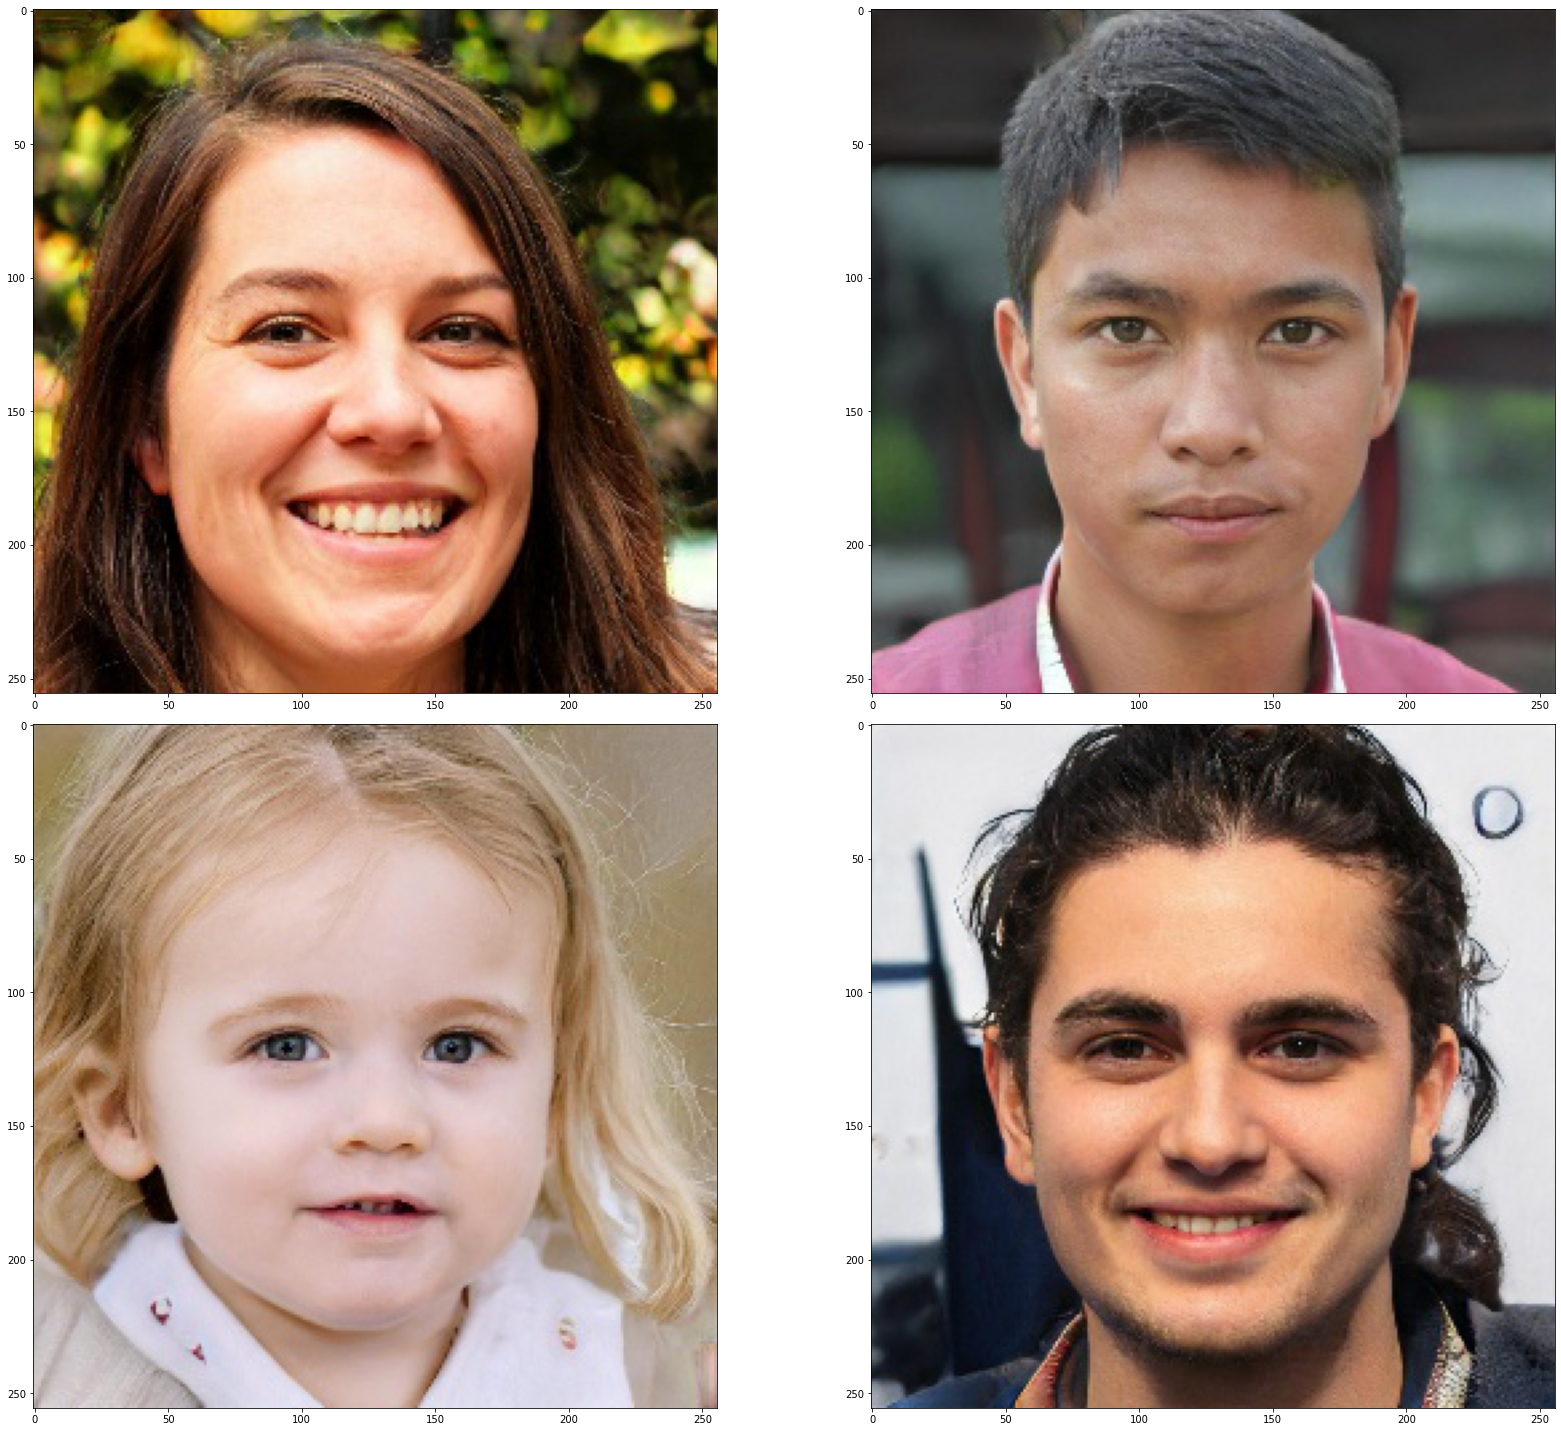

In [14]:
# plot random 4 images containing nnormal images
plt.figure(figsize = (25, 20)) 

for i in range(4):
    plt.subplot(2, 2, i+1)    #
    img = plt.imread(os.path.join(real_fake_dir, fake[i]))
#     plt.imshow(img[i])
    plt.imshow(img, cmap = 'gray')
plt.tight_layout()
plt.show()

From above it's really difficult to identify the images to be real or fake just by looking at it with our human eye.

### Model

Next comes the modelling phase where the prepocessed images are used for building a deep neural network. Let us create a convolution model with 5 layers and see how our model performance in identifying the real and fake images.

#### Model 1

Model 1 is created with 1 input layer, 5 hidden layer and 1 ouput layer

In [15]:
model1 = Sequential()
model1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model1.add(Flatten())
model1.add(Dense(units = 128 , activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units = 1 , activation = 'sigmoid'))
# compile the model with proper loss function and metrics
model1.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [16]:
# Define the callbacks for saving the best model by introducing early stopping
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10),
                  ModelCheckpoint(filepath = 'best_model1.h5', monitor = 'val_loss', save_best_only = True)]

In [17]:
# Fit the model by running 20 epochs
history1 = model1.fit(train_images, train_labels_reshape, batch_size = 32, epochs = 20, callbacks=early_stopping, validation_data = (test_images, test_labels_reshape))


Epoch 1/20
3125/3125 [==============================] - 3098s 987ms/step - loss: 0.5946 - acc: 0.7189 - val_loss: 0.3781 - val_acc: 0.8379
Epoch 2/20
3125/3125 [==============================] - 3071s 982ms/step - loss: 0.2712 - acc: 0.8930 - val_loss: 0.3063 - val_acc: 0.8753
Epoch 3/20
3125/3125 [==============================] - 3311s 1s/step - loss: 0.1894 - acc: 0.9290 - val_loss: 0.2367 - val_acc: 0.9122
Epoch 4/20
3125/3125 [==============================] - 3879s 1s/step - loss: 0.1478 - acc: 0.9468 - val_loss: 0.1551 - val_acc: 0.9417
Epoch 5/20
3125/3125 [==============================] - 3637s 1s/step - loss: 0.1251 - acc: 0.9562 - val_loss: 0.1336 - val_acc: 0.9494
Epoch 6/20
3125/3125 [==============================] - 3400s 1s/step - loss: 0.1052 - acc: 0.9638 - val_loss: 0.1407 - val_acc: 0.9493
Epoch 7/20
3125/3125 [==============================] - 3341s 1s/step - loss: 0.0932 - acc: 0.9688 - val_loss: 0.4987 - val_acc: 0.8988
Epoch 8/20
3125/3125 [====================

In [15]:
# Load the best (saved) model
from keras.models import load_model
saved_model1 = load_model('best_model1.h5')

In [16]:
# Function to calculate the train and test data accuracy value
def model_metrics(models):
    """
    Step1: Calculate the model performance on train set
    Step2: Calculate the model performance on test set
    Step3: print the result
    
    """
    train_result = models.evaluate(train_images, train_labels_reshape)
    test_result = models.evaluate(test_images, test_labels_reshape)
    return print(f'train_result:{train_result},test_result:{test_result}')

In [17]:
model_metrics(saved_model1)

625/625 [==============================] - 167s 268ms/step - loss: 0.1202 - acc: 0.9728
train_result:[0.043531812727451324, 0.9866600036621094],test_result:[0.1202194094657898, 0.9727500081062317]


In [71]:
# Function to calcuate the prediction value,classification report and confusion matrix
def model_report(models):
    """
    Step1: Predict the model performance on test set
    Step2: Print the Classification report 
    Step3: Display confusion matric to view the model performance
    
    """
    
#  checking first 15 labels of model prediction
    prediction = models.predict_classes(test_images)
    prediction = prediction.reshape(1,-1)[0]
    print("predictions:",prediction[:15])
#  classification report   
    print('classification_report :',classification_report(test_labels, prediction, target_names = ['Fake (Class 0)','Real (Class 1)']))
#  confusion matrix
    cm = confusion_matrix(test_labels,prediction)
    cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
    labels = ['Fake', 'Real']
    plt.figure(figsize = (5,5))
    ax=sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
    ax.set_ylim(2, 0)
    plt.show()

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
classification_report :                 precision    recall  f1-score   support

Fake (Class 0)       0.99      0.96      0.97     10000
Real (Class 1)       0.96      0.99      0.97     10000

      accuracy                           0.97     20000
     macro avg       0.97      0.97      0.97     20000
  weighted avg       0.97      0.97      0.97     20000



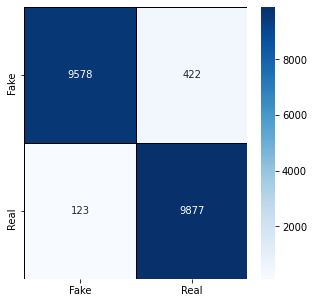

In [72]:
model_report(saved_model1)

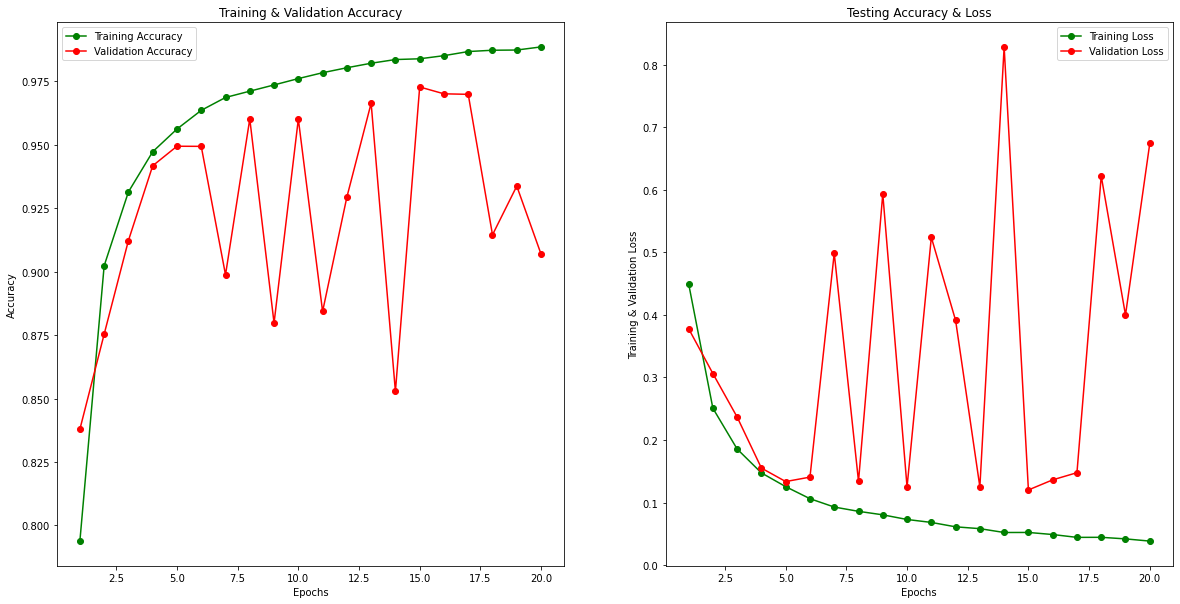

In [21]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history1.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [22]:
predictions1 = saved_model1.predict_classes(test_images)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [85]:
# Function for displaying the images correctly predicted by the model
def model_correct(model):
    """
    Step1: Model prediction and reshape
    Step2: Assign variable for correctly predicted images
    Step3: Assign variable for incorrectly predicted images
    Step4: use for loop to print only correctly predicted images
    
    """
    prediction = model.predict_classes(test_images)
    prediction = prediction.reshape(1,-1)[0]
    prediction[:15]
    correct = np.nonzero(prediction == test_labels)[0]
    incorrect = np.nonzero(prediction != test_labels)[0]
    i = 0
    for c in correct[:6]:
        plt.subplot(4,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[c].reshape(128,128,3), cmap="gray", interpolation='none')
        plt.title("Predicted Class {},Actual Class {}".format(prediction[c], test_labels[c]))
        plt.tight_layout()
        i += 1

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


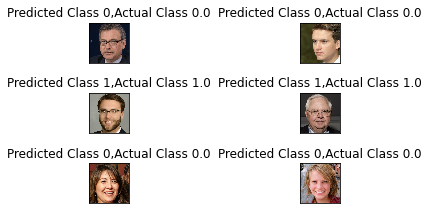

In [84]:
model_correct(saved_model1)

In [86]:
# Function for displaying the images incorrectly predicted by the model
def model_incorrect(model):
    """
    Step1: Model prediction and reshape
    Step2: Assign variable for correctly predicted images
    Step3: Assign variable for incorrectly predicted images
    Step4: use for loop to print only correctly predicted images
    
    """
    prediction = model.predict_classes(test_images)
    prediction = prediction.reshape(1,-1)[0]
    prediction[:15]
    correct = np.nonzero(prediction == test_labels)[0]
    incorrect = np.nonzero(prediction != test_labels)[0]
    i = 0
    for c in incorrect[:6]:
        plt.subplot(4,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[c].reshape(128,128,3), cmap="gray", interpolation='none')
        plt.title("Predicted Class {},Actual Class {}".format(prediction[c], test_labels[c]))
        plt.tight_layout()
        i += 1

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


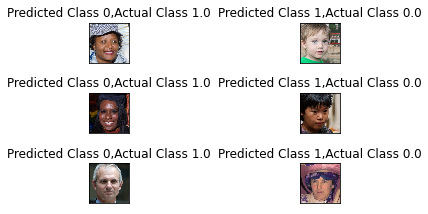

In [87]:
model_incorrect(saved_model1)

#### Model 2

In this model 2 , convolution neural network is built using keras has it works best for image classification model. Learning rate is added to check if the model has learnt accurately in predicting the real and fake images.


In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)


In [23]:
model2 = Sequential()
model2.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 128 , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model2.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)       

In [24]:
# Define the callbacks for saving the best model by introducing early stopping
early_stopping = [EarlyStopping(monitor='val_loss',patience=10),
                  ModelCheckpoint(filepath='best_model2.h5',monitor='val_loss',save_best_only=True)]

In [25]:
# Fit the model by running 20 epochs
history2 = model2.fit(train_images, train_labels_reshape, batch_size = 32, epochs = 20, validation_data = (test_images, test_labels_reshape), callbacks = [early_stopping, learning_rate_reduction])


Epoch 1/20
3125/3125 [==============================] - 3438s 1s/step - loss: 0.6086 - acc: 0.7190 - val_loss: 0.8807 - val_acc: 0.7046
Epoch 2/20
3125/3125 [==============================] - 3422s 1s/step - loss: 0.2770 - acc: 0.8920 - val_loss: 0.2182 - val_acc: 0.9142
Epoch 3/20
3125/3125 [==============================] - 3076s 984ms/step - loss: 0.2022 - acc: 0.9238 - val_loss: 0.3928 - val_acc: 0.8597
Epoch 4/20
3125/3125 [==============================] - 3086s 987ms/step - loss: 0.1536 - acc: 0.9443 - val_loss: 0.1930 - val_acc: 0.9242
Epoch 5/20
3125/3125 [==============================] - 3091s 989ms/step - loss: 0.1314 - acc: 0.9557 - val_loss: 0.2303 - val_acc: 0.9231
Epoch 6/20
3125/3125 [==============================] - 3518s 1s/step - loss: 0.1082 - acc: 0.9633 - val_loss: 0.2938 - val_acc: 0.9163

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/20
3125/3125 [==============================] - 3541s 1s/step - loss: 0.0516 - acc: 0.

In [29]:
saved_model2 = load_model('best_model2.h5')

In [30]:
# calculate the train and test data metrics
model_metrics(saved_model2)

625/625 [==============================] - 177s 284ms/step - loss: 0.0842 - acc: 0.9844
train_result:[0.0023055733181536198, 0.998989999294281],test_result:[0.0841856524348259, 0.9844499826431274]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
classification_report :                 precision    recall  f1-score   support

Fake (Class 0)       0.99      0.98      0.98     10000
Real (Class 1)       0.98      0.99      0.98     10000

      accuracy                           0.98     20000
     macro avg       0.98      0.98      0.98     20000
  weighted avg       0.98      0.98      0.98     20000



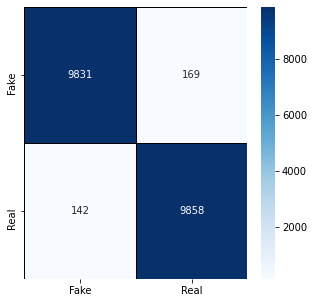

In [73]:
# Display classification report and confusion matrix
model_report(saved_model2)

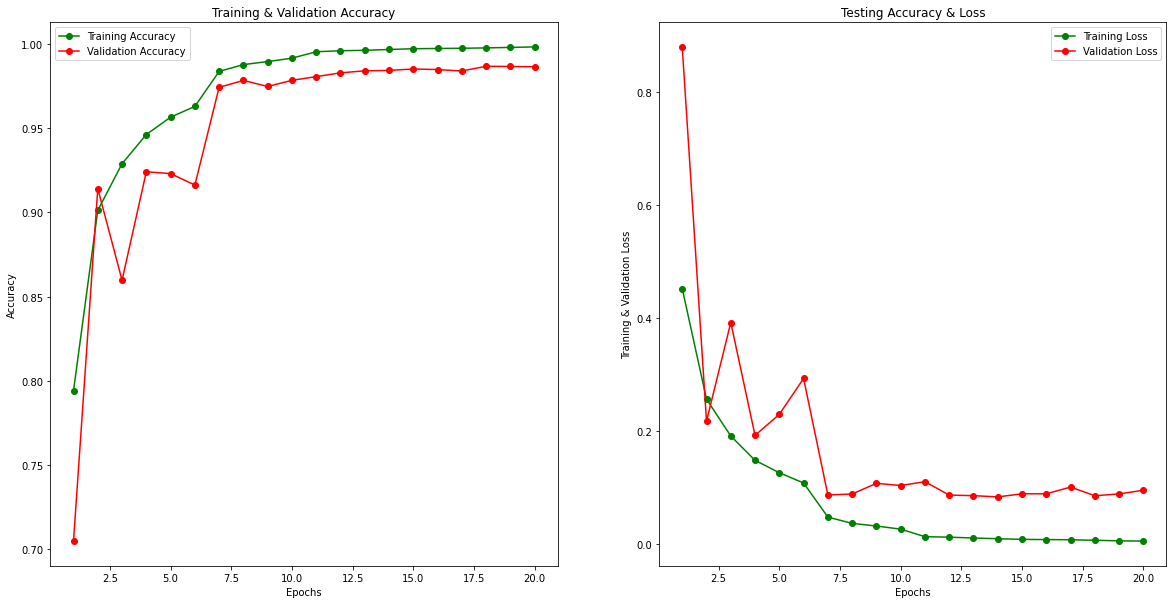

In [29]:
# Displaying the validation and accuracy loss of train and validation data
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history2.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [32]:
predictions2 = saved_model2.predict_classes(test_images)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


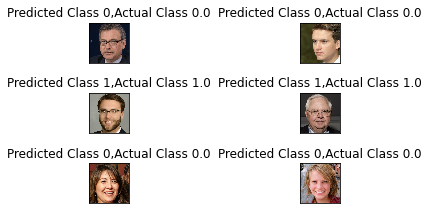

In [88]:
# Displaying the images correctly predicted by the model
model_correct(saved_model2)

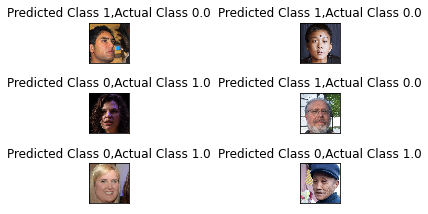

In [89]:
# Displaying the images incorrectly predicted by the model
model_incorrect(saved_model2)

#### Model 3

Model 3 is built with similar layer compared to model 2 but the number of neurons used in each layer is modified to improve the model performance.

In [30]:
model3 = Sequential()
model3.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Flatten())
model3.add(Dense(units = 2048 , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1024 , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model3.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)       

In [31]:
# Define the callbacks for saving the best model by introducing early stopping
early_stopping = [EarlyStopping(monitor='val_loss',patience=10),
                  ModelCheckpoint(filepath='best_model3.h5',monitor='val_loss',save_best_only=True)]

In [32]:
# Fit the model by running 20 epochs
batch_size = 32
history3 = model3.fit(train_images, train_labels_reshape, batch_size = 32, steps_per_epoch = int(np.ceil(100000/float(batch_size))), epochs = 20, validation_data = (test_images, test_labels_reshape),validation_steps = int(np.ceil(20000/float(batch_size))), callbacks = [early_stopping, learning_rate_reduction])



Epoch 1/20
3125/3125 [==============================] - 4779s 2s/step - loss: 1.5507 - acc: 0.6405 - val_loss: 0.3707 - val_acc: 0.8457
Epoch 2/20
3125/3125 [==============================] - 4765s 2s/step - loss: 0.3654 - acc: 0.8550 - val_loss: 0.4924 - val_acc: 0.7479
Epoch 3/20
3125/3125 [==============================] - 14709s 5s/step - loss: 0.2383 - acc: 0.9121 - val_loss: 0.4803 - val_acc: 0.8480
Epoch 4/20
3125/3125 [==============================] - 4780s 2s/step - loss: 0.1771 - acc: 0.9403 - val_loss: 2.9477 - val_acc: 0.7134
Epoch 5/20
3125/3125 [==============================] - 5272s 2s/step - loss: 0.1379 - acc: 0.9556 - val_loss: 1.6354 - val_acc: 0.8783
Epoch 6/20
3125/3125 [==============================] - 4806s 2s/step - loss: 0.1204 - acc: 0.9613 - val_loss: 0.5831 - val_acc: 0.9395
Epoch 7/20
3125/3125 [==============================] - 9982s 3s/step - loss: 0.1034 - acc: 0.9682 - val_loss: 1.4878 - val_acc: 0.9186
Epoch 8/20
3125/3125 [=========================

In [35]:
# calculate the train and test data metrics
saved_model3 = load_model('best_model3.h5')

In [36]:
# Display classification report and confusion matrix
model_metrics(saved_model3)

625/625 [==============================] - 244s 390ms/step - loss: 0.3707 - acc: 0.8457
train_result:[0.35920262336730957, 0.8507400155067444],test_result:[0.3707107603549957, 0.8456500172615051]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
classification_report :                 precision    recall  f1-score   support

Fake (Class 0)       0.81      0.90      0.85     10000
Real (Class 1)       0.89      0.79      0.84     10000

      accuracy                           0.85     20000
     macro avg       0.85      0.85      0.85     20000
  weighted avg       0.85      0.85      0.85     20000



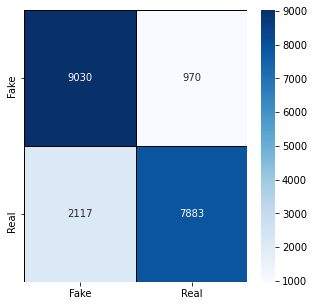

In [74]:
# Displaying the validation and accuracy loss of train and validation data
model_report(saved_model3)

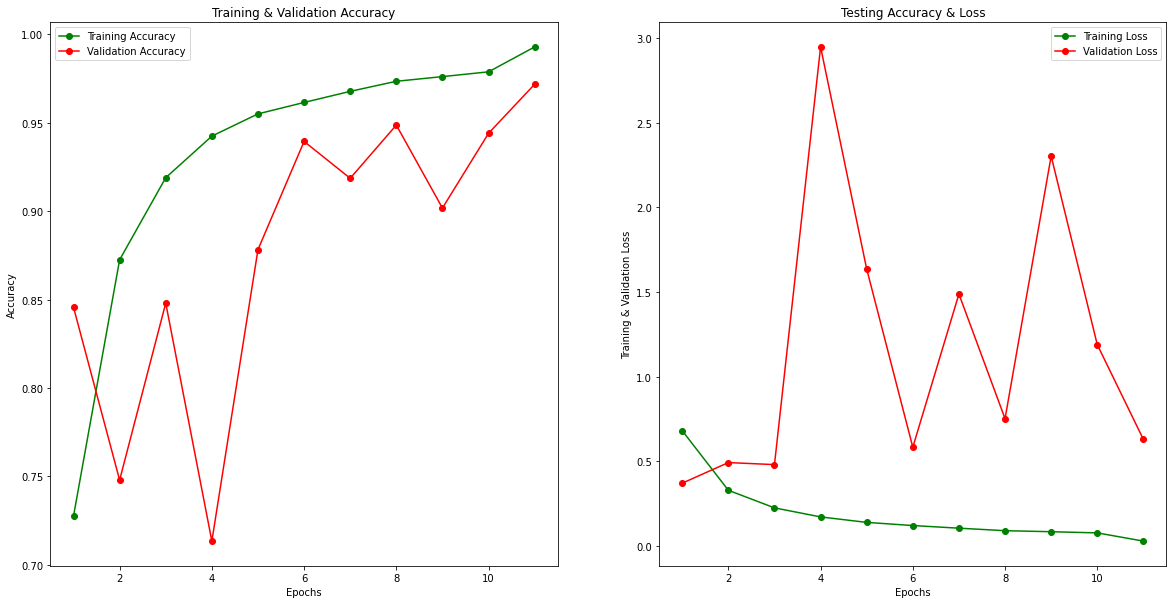

In [36]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history3.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [38]:
predictions3 = saved_model3.predict_classes(test_images)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


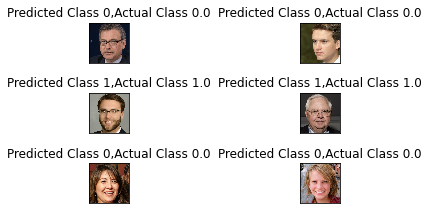

In [90]:
# Displaying the images correctly predicted by the model
model_correct(saved_model3)

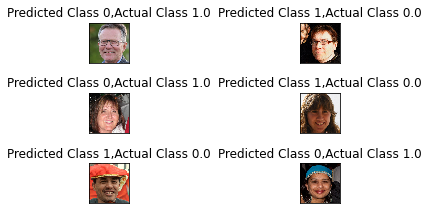

In [91]:
# Displaying the images incorrectly predicted by the model
model_incorrect(saved_model3)

#### Model 4

The number of false case is more in model 3 and hence model 4 is built to reduce the false cases. In model 4 the neurons in dense layer is increased to improve the model performance.

In [37]:
model4 = Sequential()
model4.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Flatten())
model4.add(Dense(units = 128 , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model4.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 64)       

In [38]:
# Define the callbacks for saving the best model by introducing early stopping
early_stopping = [EarlyStopping(monitor='val_loss',patience=10),
                  ModelCheckpoint(filepath='best_model4.h5',monitor='val_loss',save_best_only=True)]

In [40]:
# Fit the model by running 20 epochs
batch_size = 32
history4 = model4.fit(train_images, train_labels_reshape, batch_size = 32, steps_per_epoch = int(np.ceil(100000/float(batch_size))), epochs = 20, validation_data = (test_images, test_labels_reshape),validation_steps = int(np.ceil(20000/float(batch_size))), callbacks = [early_stopping, learning_rate_reduction])



Epoch 1/20
3125/3125 [==============================] - 3631s 1s/step - loss: 0.1097 - acc: 0.9627 - val_loss: 0.1819 - val_acc: 0.9447
Epoch 2/20
3125/3125 [==============================] - 3115s 996ms/step - loss: 0.0942 - acc: 0.9690 - val_loss: 0.1389 - val_acc: 0.9500
Epoch 3/20
3125/3125 [==============================] - 3101s 992ms/step - loss: 0.0827 - acc: 0.9720 - val_loss: 0.9215 - val_acc: 0.8263
Epoch 4/20
3125/3125 [==============================] - 3054s 977ms/step - loss: 0.0767 - acc: 0.9742 - val_loss: 0.0998 - val_acc: 0.9695
Epoch 5/20
3125/3125 [==============================] - 31948s 10s/step - loss: 0.0714 - acc: 0.9767 - val_loss: 0.4898 - val_acc: 0.8980
Epoch 6/20
3125/3125 [==============================] - 3041s 973ms/step - loss: 0.0638 - acc: 0.9797 - val_loss: 0.3283 - val_acc: 0.9340

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/20
3125/3125 [==============================] - 3082s 986ms/step - loss: 0.0278 -

In [41]:
saved_model4 = load_model('best_model4.h5')

In [42]:
# calculate the train and test data metrics
model_metrics(saved_model4)

625/625 [==============================] - 177s 284ms/step - loss: 0.0998 - acc: 0.9695
train_result:[0.04220937192440033, 0.9846699833869934],test_result:[0.09983820468187332, 0.9695000052452087]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
classification_report :                 precision    recall  f1-score   support

Fake (Class 0)       0.96      0.98      0.97     10000
Real (Class 1)       0.97      0.96      0.97     10000

      accuracy                           0.97     20000
     macro avg       0.97      0.97      0.97     20000
  weighted avg       0.97      0.97      0.97     20000



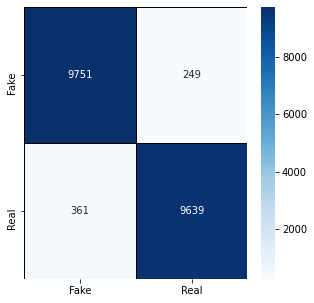

In [75]:
# Display classification report and confusion matrix
model_report(saved_model4)

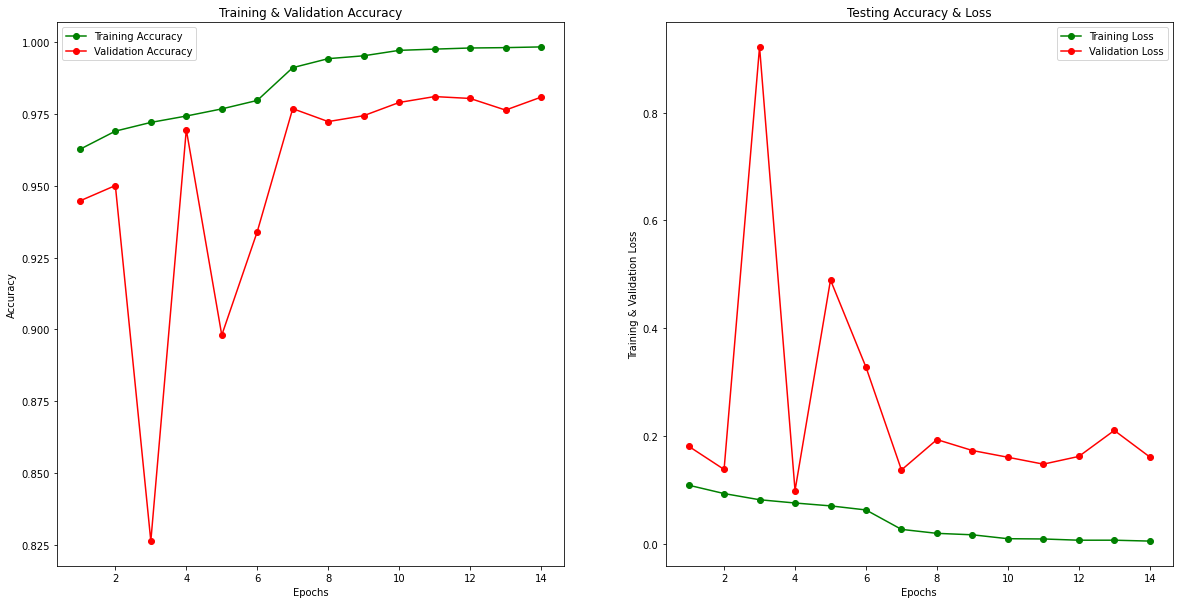

In [44]:
# Displaying the validation and accuracy loss of train and validation data
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history4.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [44]:
predictions4 = saved_model4.predict_classes(test_images)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


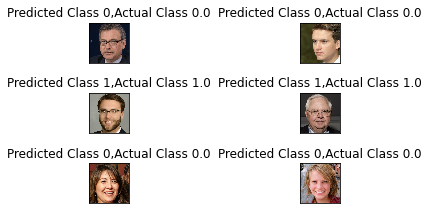

In [92]:
# Displaying the images correctly predicted by the model
model_correct(saved_model4)

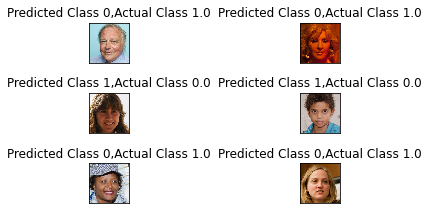

In [93]:
# Displaying the images incorrectly predicted by the model
model_incorrect(saved_model4)

#### Model 5

The false case have effectively reuced in model 4 but model 5 is built by removing the batch normalization and dropout for every layer and added only to the dense layer.

In [45]:
model5 = Sequential()
model5.add(Conv2D(32, (2,2), activation = 'relu' , input_shape = (128,128,3)))
model5.add(MaxPool2D(2,2))
           
model5.add(Conv2D(64, (3,3), activation = 'relu'))
model5.add(MaxPool2D(2,2))
           
model5.add(Conv2D(128, (3,3), activation = 'relu'))
model5.add(MaxPool2D(2,2))

model5.add(Conv2D(256, (3,3), activation = 'relu'))
model5.add(MaxPool2D(2,2))

model5.add(Conv2D(512, (3,3), activation = 'relu'))
model5.add(MaxPool2D(2,2))

model5.add(Dropout(0.5))
model5.add(Flatten())
model5.add(Dense(units = 2048, activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(Dense(units = 1024, activation = 'relu'))
model5.add(Dropout(0.05))
model5.add(BatchNormalization())
model5.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model5.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['acc'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 127, 127, 32)      416       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 256)      

In [46]:
# Define the callbacks for saving the best model by introducing early stopping
early_stopping = [EarlyStopping(monitor='val_loss',patience=10),
                  ModelCheckpoint(filepath='best_model5.h5',monitor='val_loss',save_best_only=True)]

In [47]:
# Fit the model by running 20 epochs
batch_size = 32
history5 = model5.fit(train_images, train_labels_reshape, batch_size = 32, steps_per_epoch = int(np.ceil(100000/float(batch_size))), epochs = 20, validation_data = (test_images, test_labels_reshape),validation_steps = int(np.ceil(20000/float(batch_size))), callbacks = [early_stopping, learning_rate_reduction])



Epoch 1/20
3125/3125 [==============================] - 2980s 950ms/step - loss: 0.7173 - acc: 0.5008 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 2/20
3125/3125 [==============================] - 2438s 780ms/step - loss: 0.6843 - acc: 0.5412 - val_loss: 0.8251 - val_acc: 0.5108
Epoch 3/20
3125/3125 [==============================] - 2443s 781ms/step - loss: 0.4476 - acc: 0.7929 - val_loss: 0.4156 - val_acc: 0.8226
Epoch 4/20
3125/3125 [==============================] - 25983s 8s/step - loss: 0.3156 - acc: 0.8654 - val_loss: 0.2519 - val_acc: 0.8985
Epoch 5/20
3125/3125 [==============================] - 3392s 1s/step - loss: 0.2355 - acc: 0.9039 - val_loss: 0.2208 - val_acc: 0.9138
Epoch 6/20
3125/3125 [==============================] - 3090s 988ms/step - loss: 0.1951 - acc: 0.9222 - val_loss: 0.2299 - val_acc: 0.9029
Epoch 7/20
3125/3125 [==============================] - 3305s 1s/step - loss: 0.1611 - acc: 0.9362 - val_loss: 0.1590 - val_acc: 0.9360
Epoch 8/20
3125/3125 [=============

In [47]:
saved_model5 = load_model('best_model5.h5')

In [77]:
# calculate the train and test data metrics
model_metrics(saved_model5)

625/625 [==============================] - 138s 220ms/step - loss: 0.1100 - acc: 0.9646
train_result:[0.01780514605343342, 0.99440997838974],test_result:[0.10996602475643158, 0.9646499752998352]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
classification_report :                 precision    recall  f1-score   support

Fake (Class 0)       0.96      0.97      0.96     10000
Real (Class 1)       0.97      0.96      0.96     10000

      accuracy                           0.96     20000
     macro avg       0.96      0.96      0.96     20000
  weighted avg       0.96      0.96      0.96     20000



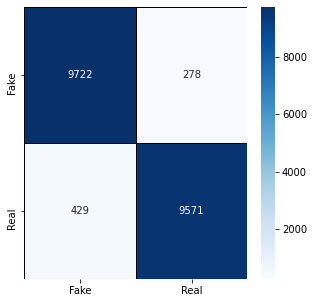

In [76]:
# Display classification report and confusion matrix
model_report(saved_model5)

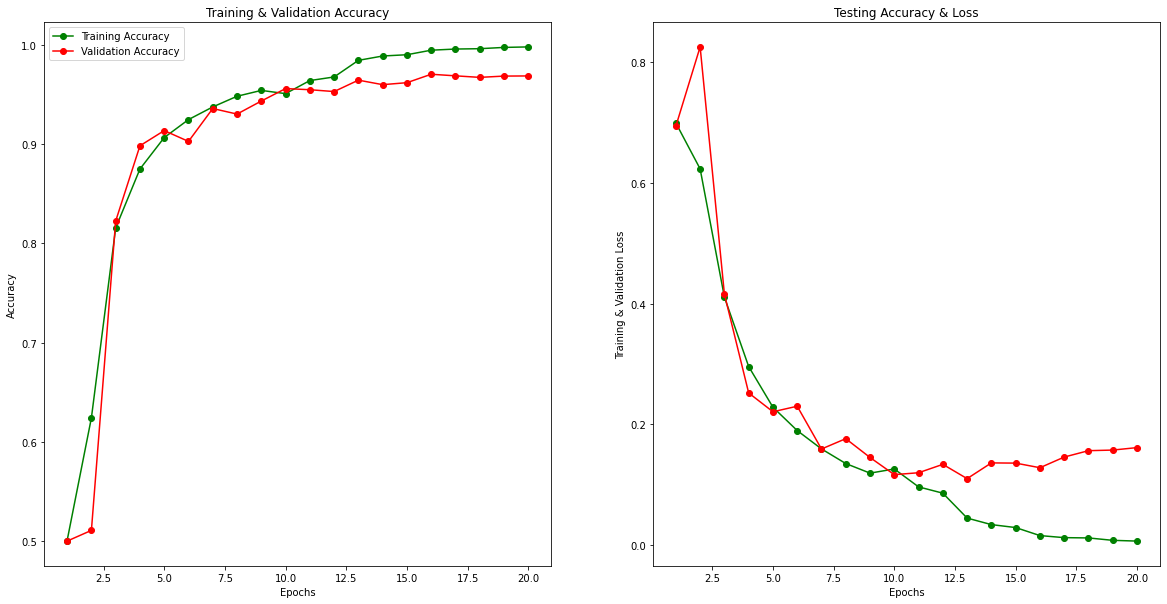

In [52]:
# Displaying the validation and accuracy loss of train and validation data
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history5.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [49]:
predictions5 = saved_model5.predict_classes(test_images)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


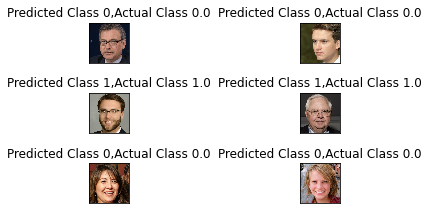

In [94]:
# Displaying the images correctly predicted by the model
model_correct(saved_model5)

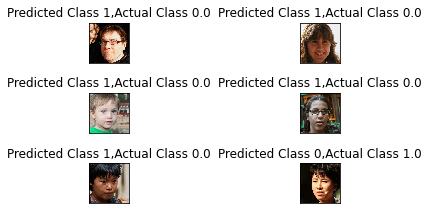

In [95]:
# Displaying the images incorrectly predicted by the model
model_incorrect(saved_model5)

## Interpretation

Comparing all the above model , model 2 have performed well in terms of accuracy, false positive and false negative cases. The overfitting and underfitting of the train and validation data is also reduced. Hence with the accuracy rate of 98% model 2 is considered for predicting the real and fake faces.


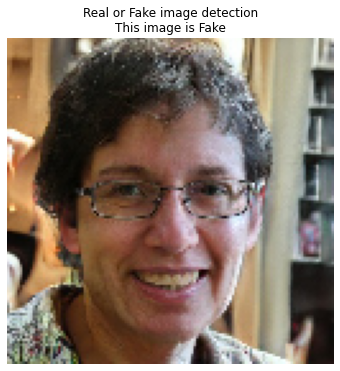

In [52]:
# Testing with my own locally saved images
hardik_path = '/Users/janakiganesh/Documents/Material/Phase5/project/Data/real-vs-fake/valid/fake/0F14JGVRL8.jpg'
from tensorflow.keras.preprocessing import image
hardik_img = image.load_img(hardik_path, target_size=(128, 128),color_mode='rgb',grayscale=False)
# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)
#predict
hardik_preds= saved_model2.predict_classes(pp_hardik_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if (hardik_preds == 1).all(): 
    out = ('This image is Real!'.format(hardik_preds[0]))
    
else: 
    out = ('This image is Fake'.format(1-hardik_preds[0]))
plt.title("Real or Fake image detection\n"+out)  
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()

## Conclusion

Comparing all the above built models, model 2 have performed well in terms of metrics as it has reduced number of false cases and the train and test data shows good fit in the graph. Hence model 2 could be considered as the best model for detecting the real or fake images. 

## Next Step

* Collection of original face detection report from The United States Department of Homeland     Security team to check for the model performance
* Model to detect masked face
* Adding more complex structure to the model for enhancing the model performance
* Reducing the false negative cases as much as possible
* creating more models with tuned parameters to compare the results



